#### Case - Churn- PetLove

In [52]:
#Import bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [53]:
#Importa arquivo CSV
headers = ['id','created_at','updated_at','deleted_at','name_hash','email_hash','address_hash','birth_date','status','version','city','state','neighborhood','last_date_purchase','average_ticket','items_quantity','all_revenue','all_orders','recency','marketing_source']
date_cols = ['created_at','updated_at','deleted_at','birth_date','last_date_purchase']
file = 'tb_churn.csv'
df = pd.read_csv(file, sep=';', names=headers, parse_dates=date_cols, skiprows=1)


   #### limpar dados redundantes e não discriminante.

In [54]:
df.drop(['name_hash','email_hash','address_hash'], axis=1, inplace=True)


#### Ordena Dados

In [55]:
df = df.sort_values(by='created_at',ascending=True)
df.head()

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
7189,b5616708-3730-4f8e-8ea2-27f09e85693b,2016-02-19 10:00:00,2020-12-25 10:09:00,2020-12-25 10:09:00,2067-11-19,canceled,4.-10.11,da Paz de Araújo,PE,Nossa Senhora Aparecida,2020-07-02 18:06:00,216.110.977.905.574,6,216.110.977.905.574,10,230,paid_search
510,22eb2358-3377-4205-8fd8-032112af9e14,2016-02-19 15:23:00,2021-01-05 11:23:00,NaT,1979-10-21,active,4.21.7,Moura do Campo,BA,Santa Monica,2021-01-05 11:23:00,219.380.655.878.841,11,241.318.721.466.726,11,44,paid_search
4360,bf0a8d31-a34d-48dc-8e70-972a3bfeb491,2016-02-19 15:41:00,2020-05-24 20:21:00,2020-05-24 20:21:00,1973-01-11,canceled,4.31.8,Ribeiro,BA,Vila Oeste,2018-08-22 09:56:00,202.926.239.612.519,7,608.778.718.837.556,3,911,organic_search
1782,4764f142-330d-4c47-a880-8df7220ef5ce,2016-02-19 16:36:00,2021-01-20 11:23:00,NaT,1970-08-07,active,4.30.4,Martins,PA,Brasil Industrial,2021-01-20 11:23:00,183.678.010.779.089,6,202.045.811.856.998,11,29,paid_search
7986,bf6fb9c1-340a-4e34-b14a-ee53ddbc7bbf,2016-02-19 16:37:00,2020-02-04 11:05:00,2020-02-04 11:05:00,1993-07-29,canceled,3.-2.11,Gonçalves Verde,PA,São Marcos,2018-02-08 18:15:00,184.122.656.951.029,3,202.534.922.646.132,11,1105,direct


In [56]:
#Resumo  do dataframe
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 7189 to 3200
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  10000 non-null  object        
 1   created_at          10000 non-null  datetime64[ns]
 2   updated_at          10000 non-null  datetime64[ns]
 3   deleted_at          505 non-null    datetime64[ns]
 4   birth_date          10000 non-null  datetime64[ns]
 5   status              10000 non-null  object        
 6   version             10000 non-null  object        
 7   city                10000 non-null  object        
 8   state               10000 non-null  object        
 9   neighborhood        10000 non-null  object        
 10  last_date_purchase  10000 non-null  datetime64[ns]
 11  average_ticket      10000 non-null  object        
 12  items_quantity      10000 non-null  int64         
 13  all_revenue         10000 non-null  object  

In [57]:
#Converte all_revenue type float
df['all_revenue'] = df['all_revenue'].str.replace('.','')
df['all_revenue'] = df['all_revenue'].astype('float')

C:\Users\acer\AppData\Local\Temp/ipykernel_1548/3895682974.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['all_revenue'] = df['all_revenue'].str.replace('.','')


In [58]:
df.dtypes

id                            object
created_at            datetime64[ns]
updated_at            datetime64[ns]
deleted_at            datetime64[ns]
birth_date            datetime64[ns]
status                        object
version                       object
city                          object
state                         object
neighborhood                  object
last_date_purchase    datetime64[ns]
average_ticket                object
items_quantity                 int64
all_revenue                  float64
all_orders                     int64
recency                        int64
marketing_source              object
dtype: object

In [59]:
# Criar uma coluna Churn 'SIM' para 'canceled' e NÃO para 'pause' e 'active'
df['Churn'] = df['status'].map({'canceled':'SIM',
                             'active':'NÃO',
                             'paused':'NÃO',
                             np.nan:'NY'},
                             na_action=None)
df.head()


,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,Churn
7189,b5616708-3730-4f8e-8ea2-27f09e85693b,2016-02-19 10:00:00,2020-12-25 10:09:00,2020-12-25 10:09:00,2067-11-19,canceled,4.-10.11,da Paz de Araújo,PE,Nossa Senhora Aparecida,2020-07-02 18:06:00,216.110.977.905.574,6,2.161110e+14,10,230,paid_search,SIM
510,22eb2358-3377-4205-8fd8-032112af9e14,2016-02-19 15:23:00,2021-01-05 11:23:00,NaT,1979-10-21,active,4.21.7,Moura do Campo,BA,Santa Monica,2021-01-05 11:23:00,219.380.655.878.841,11,2.413187e+14,11,44,paid_search,NÃO
4360,bf0a8d31-a34d-48dc-8e70-972a3bfeb491,2016-02-19 15:41:00,2020-05-24 20:21:00,2020-05-24 20:21:00,1973-01-11,canceled,4.31.8,Ribeiro,BA,Vila Oeste,2018-08-22 09:56:00,202.926.239.612.519,7,6.087787e+14,3,911,organic_search,SIM
1782,4764f142-330d-4c47-a880-8df7220ef5ce,2016-02-19 16:36:00,2021-01-20 11:23:00,NaT,1970-08-07,active,4.30.4,Martins,PA,Brasil Industrial,2021-01-20 11:23:00,183.678.010.779.089,6,2.020458e+14,11,29,paid_search,NÃO
7986,bf6fb9c1-340a-4e34-b14a-ee53ddbc7bbf,2016-02-19 16:37:00,2020-02-04 11:05:00,2020-02-04 11:05:00,1993-07-29,canceled,3.-2.11,Gonçalves Verde,PA,São Marcos,2018-02-08 18:15:00,184.122.656.951.029,3,2.025349e+14,11,1105,direct,SIM


###### - Número de cancelamento Geral

Total de assinaturas realizadas: 10000
Assinaturas no sistemas: 9495
Assinaturas canceladas: 505
Porcetagem de assinaturas canceladas: 5.05%


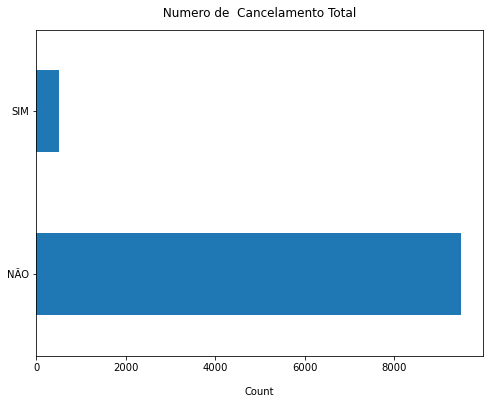

In [64]:
# Número de cancelamento com a formula churn.
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("", labelpad=14)
plt.title(" Numero de  Cancelamento Total ", y=1.02);

total_assinaturas = len(df)
print(f'Total de assinaturas realizadas: {total_assinaturas}')

assinaturas_no_sistema = df['deleted_at'].isnull().sum()
print(f'Assinaturas no sistemas: {assinaturas_no_sistema}')

assinaturas_canceladas = df['deleted_at'].notnull().sum()
print(f'Assinaturas canceladas: {assinaturas_canceladas}')
print('Porcetagem de assinaturas canceladas: {:.2%}'.format(assinaturas_canceladas/total_assinaturas))


#### - Quantidade de churn por pedido

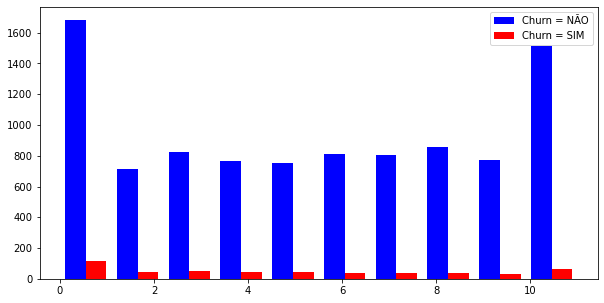

In [61]:
# quantidade de Churn por pedido
dfno = df[df.Churn=='NÃO'].all_orders
dfyes = df[df.Churn=='SIM'].all_orders
plt.figure(figsize=(10,5))
plt.hist([dfno, dfyes], color=['blue','red'], label=['Churn = NÃO', 'Churn = SIM'])
plt.legend()


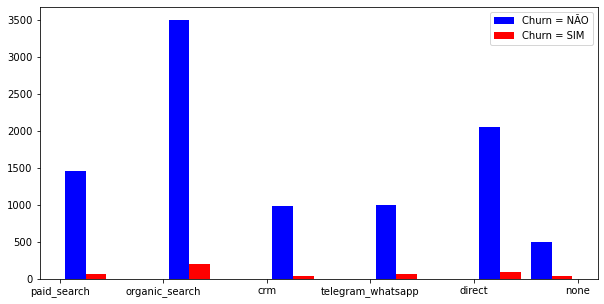

In [62]:
# quantidade de cancelamento por origem
dfno = df[df.Churn=='NÃO'].marketing_source
dfyes = df[df.Churn=='SIM'].marketing_source
plt.figure(figsize=(10,5))
plt.hist([dfno, dfyes], color=['blue','red'], label=['Churn = NÃO', 'Churn = SIM'])
plt.legend()

#### - Número de cancelamento por assinatura criada

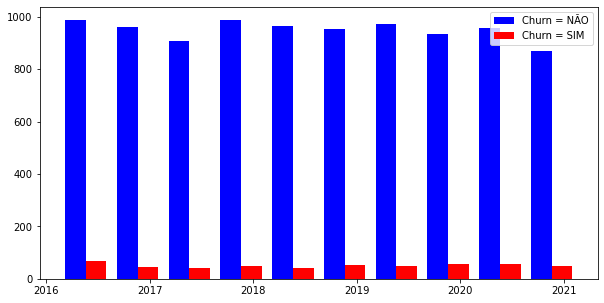

In [63]:
dfno = df[df.Churn=='NÃO'].created_at
dfyes = df[df.Churn=='SIM'].created_at
plt.figure(figsize=(10,5))
plt.hist([dfno, dfyes], color=['blue','red'], label=['Churn = NÃO', 'Churn = SIM'])
plt.legend()



#### - Número de cancelamento por Estado Anual

In [ ]:
dfno = df[df.Churn=='NÃO'].state
dfyes = df[df.Churn=='SIM'].state
plt.figure(figsize=(10,5))
plt.hist([dfno, dfyes], color=['blue','red'], label=['Churn = NÃO', 'Churn = SIM'])
plt.legend()

In [65]:
#Index em status
status_df = df.set_index('status')

#### - Assinatura ativas por origem

In [66]:
status_ativo = status_df.loc['active','marketing_source'].value_counts()
status_ativo

organic_search       3118
direct               1872
paid_search          1307
telegram_whatsapp     914
crm                   874
none                  439
Name: marketing_source, dtype: int64

#### - cancelamento por origem

In [67]:
status_cancelado = status_df.loc['canceled','marketing_source'].value_counts()
status_cancelado

organic_search       196
direct                96
paid_search           70
telegram_whatsapp     66
crm                   43
none                  34
Name: marketing_source, dtype: int64

#### - pausa por origem

In [68]:
status_pausa = status_df.loc['paused','marketing_source'].value_counts()
status_pausa

organic_search       385
direct               181
paid_search          149
crm                  112
telegram_whatsapp     88
none                  56
Name: marketing_source, dtype: int64

#### Numeros de cancelamentos por versão da assinatura

In [69]:
#Numreos de cancelamento por Versão da assinatura
status_est_ver = status_df.loc['canceled','version'].value_counts()
status_est_ver



4.28.11    3
3.25.9     3
3.22.5     3
4.24.9     3
3.11.8     3
          ..
4.28.7     1
4.7.8      1
2.17.9     1
2.47.6     1
6.3.4      1
Name: version, Length: 442, dtype: int64

* Foi realizado um checking  geral de toda a tabela para análisar alguma anomalia de cancelamento de assinatura.
    

#### Criar um tabela com os dados de  created, status e deleted

In [70]:
user = df.groupby(['id'])['created_at','status','deleted_at'].min().reset_index()
user.head()

C:\Users\acer\AppData\Local\Temp/ipykernel_1548/944090987.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  user = df.groupby(['id'])['created_at','status','deleted_at'].min().reset_index()


,id,created_at,status,deleted_at
0,0004a482-4870-4700-8de6-a4585ac12ec6,2017-03-14 07:37:00,active,NaT
1,00073fa0-e3cb-4d73-ac83-afe5849ff4be,2016-04-10 20:47:00,active,NaT
2,001cd159-f443-442d-9f58-932eaf6b0c99,2016-07-23 17:10:00,paused,NaT
3,0020704b-96cd-4c91-a14d-feb01991efd5,2016-05-23 06:50:00,active,NaT
4,00234ee8-bb77-43b7-baee-a578d9e68071,2018-11-27 08:07:00,paused,NaT


In [71]:
# Trocar o created_at e deleted_At para datetime Mensal
user['created_at'] = user['created_at'].values.astype('datetime64[M]')
user['deleted_at'] = user['deleted_at'].values.astype('datetime64[M]')

#### - Gerar uma tabela com cada mês possivel para cada usário

In [72]:
#Verificar a data minima e máxima da tabela
min_month = df['created_at'].values.astype('datetime64[M]').min()
max_month = df['created_at'].values.astype('datetime64[M]').max()
(min_month, max_month)

(numpy.datetime64('2016-02'), numpy.datetime64('2021-02'))

In [73]:
# Criar um tabela com o 1 dia no Mês atraves da frequencia  'MS'
pd.date_range(min_month,max_month,freq='MS')

DatetimeIndex(['2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
      

In [74]:
#Obeter o primeiro dia do Mês com 'MS'
dr = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
dr.columns = ['month']
dr

,month
0,2016-02-01
1,2016-03-01
2,2016-04-01
3,2016-05-01
4,2016-06-01
...,...
56,2020-10-01
57,2020-11-01
58,2020-12-01
59,2021-01-01


In [75]:
#Criar uma coluna com ANO
dr['year'] = dr['month'].dt.year
dr

,month,year
0,2016-02-01,2016
1,2016-03-01,2016
2,2016-04-01,2016
3,2016-05-01,2016
4,2016-06-01,2016
...,...,...
56,2020-10-01,2020
57,2020-11-01,2020
58,2020-12-01,2020
59,2021-01-01,2021


In [76]:
# realizar a junção cruzada com a tabela user + dr = report
dr['key'] = 1
user['key'] = 1
report = dr.merge(user,on='key')
report.head()

,month,year,key,id,created_at,status,deleted_at
0,2016-02-01,2016,1,0004a482-4870-4700-8de6-a4585ac12ec6,2017-03-01,active,NaT
1,2016-02-01,2016,1,00073fa0-e3cb-4d73-ac83-afe5849ff4be,2016-04-01,active,NaT
2,2016-02-01,2016,1,001cd159-f443-442d-9f58-932eaf6b0c99,2016-07-01,paused,NaT
3,2016-02-01,2016,1,0020704b-96cd-4c91-a14d-feb01991efd5,2016-05-01,active,NaT
4,2016-02-01,2016,1,00234ee8-bb77-43b7-baee-a578d9e68071,2018-11-01,paused,NaT


In [77]:
#Realizar um filtro a onde o status seja diferente de 'canceled'
#Posteriormente realizar a contagem da base do mês e realizar o calculo de Churn 
#Active e Paused é a base para cada mês

report = report[
            (
                (report['month']>=report['created_at']) & (report['status']!='canceled')
            )
            |
            (
                (report['month']>=report['created_at']) & (report['month']<=report['deleted_at'])
            )
    ] 

In [78]:
# Data de assinatura igual ao inicio de cada mês   = coluna new (+ 1)
# Data de cancelamento  igual ao inicia de cada mês = coluna lost (+ 1)
# Status diferente de 'Canceled' = coluna active_today (+1)

report['user'] = 1
report['new'] = (report['created_at'] == report['month']) * 1
report['lost'] = (report['deleted_at'] == report['month']) * 1
report['active_today'] = (report['status'] != 'canceled') * 1

In [79]:
report.head()

,month,year,key,id,created_at,status,deleted_at,user,new,lost,active_today
67,2016-02-01,2016,1,02009916-af42-47c9-a2ea-f05d3a53873b,2016-02-01,canceled,2017-08-01,1,1,0,0
79,2016-02-01,2016,1,024a318a-720f-480f-8a97-789438ae9014,2016-02-01,active,NaT,1,1,0,1
239,2016-02-01,2016,1,0652b926-8d0d-4610-ab35-51b2015e17d4,2016-02-01,active,NaT,1,1,0,1
358,2016-02-01,2016,1,091ade8a-2f01-4aa9-aaf2-335426b0f2fe,2016-02-01,active,NaT,1,1,0,1
406,2016-02-01,2016,1,0a3769c4-787f-48c5-895e-c3fd14d47326,2016-02-01,active,NaT,1,1,0,1


- Essa tabela permite verificar numeros absolutos de cliente mensal, novos clientes e também permite verificar a quantidade de cancelamento mensal.


In [80]:
#Temos uma tabela representando por inicio de mês a quantidade de cliente , cancelamento e a base de clientes mensal.
# Realizar a soma dos campos User ,New e Lost e verificar a situação de cada mês .
df_base =report.groupby('month')[['user','new','lost','active_today']].agg('sum')
df_base

,user,new,lost,active_today
month,,,,
2016-02-01,70,70,0,62
2016-03-01,242,172,0,221
2016-04-01,391,149,0,361
2016-05-01,572,181,1,537
2016-06-01,770,199,1,728
...,...,...,...,...
2020-10-01,9085,157,20,8967
2020-11-01,9207,142,32,9097
2020-12-01,9338,163,37,9256


* Podemos análisar por mês a quantidade de novos usúarios.
* Quantidades de cancelamento por mês 
* Quantidades de ativos por mês
* Maior numero de cancelamento mensal de assinatura se encontra no mês de novembro, dezembro e Janeiro

In [81]:
#Taxa de Churn mensal 
# Numero de clientes que cancelou a assinatura / clientes que estão na base user como usuário 
df_base['churn'] = df_base['lost']/df_base['user']* 100

In [82]:
df_base

,user,new,lost,active_today,churn
month,,,,,
2016-02-01,70,70,0,62,0.000000
2016-03-01,242,172,0,221,0.000000
2016-04-01,391,149,0,361,0.000000
2016-05-01,572,181,1,537,0.174825
2016-06-01,770,199,1,728,0.129870
...,...,...,...,...,...
2020-10-01,9085,157,20,8967,0.220143
2020-11-01,9207,142,32,9097,0.347562
2020-12-01,9338,163,37,9256,0.396230


Text(0, 0.5, ' % ')

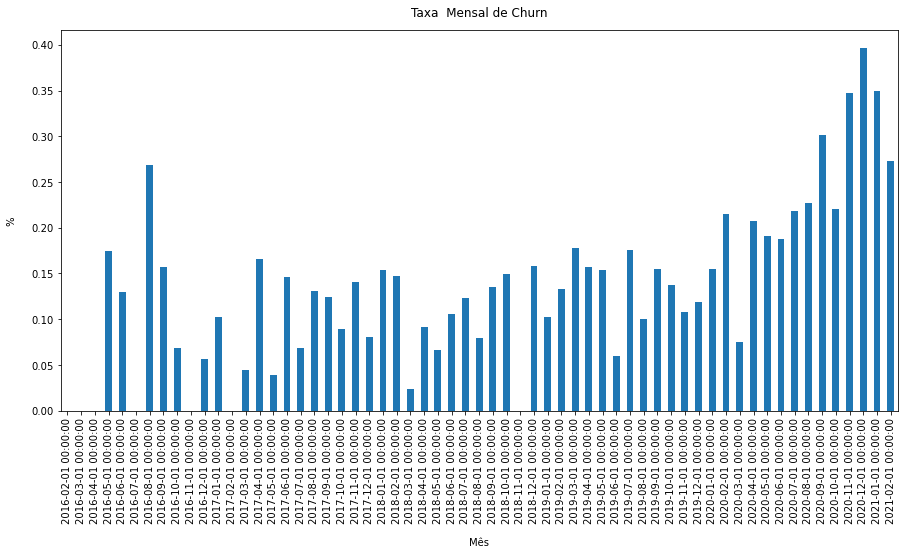

In [83]:
# Criar um gráfico com a coluna churn mensal.
df_base['churn'].plot(figsize=(15, 7),kind='bar')
plt.title("Taxa  Mensal de Churn", y=1.02);
plt.xlabel("Mês", labelpad=14)
plt.ylabel(" % ", labelpad=14)

* O Mês de Novembro, dezembro e Janeiro(2021) teve o maior aumento percentual de churn 

In [84]:
df_base.describe()

,user,new,lost,active_today,churn
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,4985.901639,163.934426,8.278689,4849.360656,0.133860
std,2847.878542,18.959491,8.790395,2819.662238,0.089038
min,70.000000,70.000000,0.000000,62.000000,0.000000
25%,2579.000000,157.000000,2.000000,2456.000000,0.074655
50%,5035.000000,165.000000,6.000000,4858.000000,0.133289
75%,7441.000000,172.000000,11.000000,7253.000000,0.174825
max,9521.000000,199.000000,37.000000,9495.000000,0.396230


* O describe nos mostra um percentual médio  mensal de 0.13% de churn.
* Através desses dados manteria um percentual para equipe 0,07% mensal.
* Acima desse valor estabelecido realizar uma análise mais detalhada para não refletir no Mês posterior.


In [85]:
#Criar uma tabela com os mês que obteve mais assinaturas canceladas conforme df_base para análise.

df_dez = df[(df['deleted_at'].dt.month == 12 ) & (df['deleted_at'].dt.year == 2020)  ] 
df_dez= pd.DataFrame(df_dez)
df_dez

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,Churn
7189,b5616708-3730-4f8e-8ea2-27f09e85693b,2016-02-19 10:00:00,2020-12-25 10:09:00,2020-12-25 10:09:00,2067-11-19,canceled,4.-10.11,da Paz de Araújo,PE,Nossa Senhora Aparecida,2020-07-02 18:06:00,216.110.977.905.574,6,2.161110e+14,10,230,paid_search,SIM
4206,df1f4a3a-b0b6-4744-aa6b-6004de90af94,2016-04-16 02:58:00,2020-12-26 16:37:00,2020-12-26 16:37:00,2057-09-22,canceled,4.20.11,Jesus,RR,Ouro Minas,2018-04-21 15:38:00,235.586.579.747.642,3,1.884693e+14,8,1033,paid_search,SIM
9417,19ffec34-85c5-4619-97e8-55e1372941e7,2016-08-13 10:41:00,2020-12-07 20:26:00,2020-12-07 20:26:00,2050-10-17,canceled,2.3.7,Barros do Campo,AL,Rio Branco,2017-07-01 11:01:00,202.578.839.147.657,13,6.077365e+13,3,1328,paid_search,SIM
8206,53db4687-630a-4f5a-80a4-6427939575ea,2016-12-08 11:00:00,2020-12-30 17:28:00,2020-12-30 17:28:00,2051-03-19,canceled,5.13.7,Nascimento,RO,Santo André,2019-10-06 21:40:00,196.437.039.066.244,5,0.000000e+00,0,500,direct,SIM
5288,0aa3d11b-148f-41d3-94cc-a215530606a7,2017-02-25 09:05:00,2020-12-01 03:16:00,2020-12-01 03:16:00,1957-06-07,canceled,3.43.9,da Mata de Goiás,AC,Olaria,2019-09-24 23:21:00,186.365.699.460.396,18,1.677291e+14,9,512,none,SIM
7076,daba3f5e-339c-40aa-92a0-8af53987065b,2018-01-12 22:59:00,2020-12-29 05:49:00,2020-12-29 05:49:00,1969-04-07,canceled,3.42.7,da Paz da Serra,DF,Lindéia,2019-01-17 23:29:00,261.245.514.153.245,8,2.873701e+14,11,762,organic_search,SIM
3388,831f7204-b6ed-40af-b1f0-23d8d80de369,2018-06-12 23:35:00,2020-12-11 05:11:00,2020-12-11 05:11:00,1990-07-20,canceled,5.34.9,Moreira,AM,Ápia,2018-07-03 11:34:00,171.262.053.943.298,8,8.563103e+14,5,960,organic_search,SIM
8647,b95535a7-d401-4d27-9db2-9a376ed0d393,2018-08-20 09:01:00,2020-12-25 07:08:00,2020-12-25 07:08:00,1948-06-07,canceled,3.28.6,Mendes da Mata,BA,Santa Lúcia,2020-01-22 03:33:00,184.204.637.305.731,13,7.368185e+14,4,393,telegram_whatsapp,SIM
4759,e08296fe-b2ef-495e-b64e-d2ee9614a36c,2019-01-06 09:24:00,2020-12-21 17:34:00,2020-12-21 17:34:00,2062-05-25,canceled,4.10.14,Novaes,PR,Serrano,2020-04-18 07:49:00,212.917.829.267.829,12,2.342096e+14,11,306,crm,SIM
1515,778bda4c-a47c-416a-9d96-f184a8ef4744,2019-07-02 14:02:00,2020-12-30 08:29:00,2020-12-30 08:29:00,1986-01-30,canceled,2.15.10,Porto,MT,Santa Maria,2020-01-26 07:35:00,239.611.050.542.705,10,1.198055e+14,5,389,organic_search,SIM


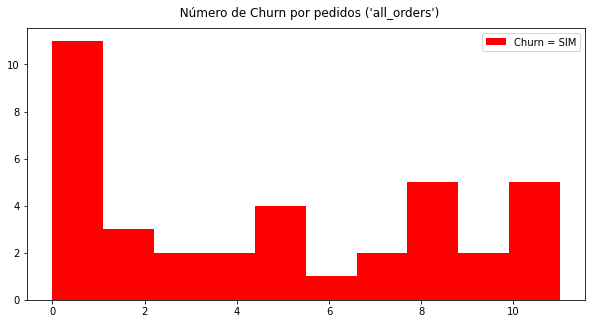

In [99]:
#Número absoluto de cancelamento mensal mês de Dezembro referente a pedidos do cliente.

dfyes = df_dez[df_dez.Churn=='SIM'].all_orders
plt.figure(figsize=(10,5))
plt.hist([dfyes], color=['Red'], label=['Churn = SIM'])
plt.title("  Número de Churn por pedidos ('all_orders')", y=1.02);
plt.legend()



* O Grafico mostra que a maior numero de cancelamento no mês de  dezembro é referente a clientes que não fez nenhum  pedido .

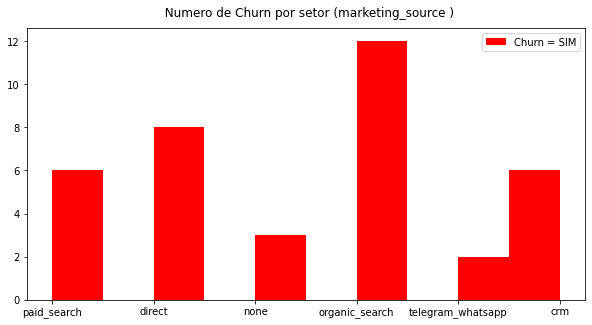

In [98]:
#Números de cancelamento por setor
dfyes = df_dez[df_dez.Churn=='SIM'].marketing_source 
plt.figure(figsize=(10,5))
plt.hist([dfyes], color=['Red'], label=['Churn = SIM'])
plt.title("  Numero de Churn por setor (marketing_source )", y=1.02)
plt.legend()



* O setor organic_serch em numeros absolutos tem a maior quantidade de cancelamento por assinatua .


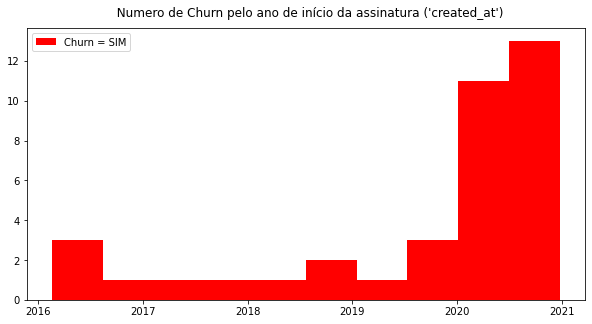

In [97]:
#Numero de Cancelamento pelo ano de  criação da assinatura. 
dfyes = df_dez[df_dez.Churn=='SIM'].created_at

plt.figure(figsize=(10,5))
plt.hist([dfyes], color=['Red'], label=['Churn = SIM'])
plt.title("  Numero de Churn pelo ano de início da assinatura ('created_at')", y=1.02)
plt.legend()


* O maior numero de cancelamento no mês de dezembro é  referente a novos clientes que realizaram suas assinaturas no ano de  2020.


#### Conclusão 

1. Olhando de modo geral os dados da tabela não encontro nenhuma anomália que chame atenção ao Churn

2. Através da tabela df_base podemos construir metas mensais para a equipe de churn.
3. Os  insights que tirei dessa análise :
* Clientes novos tem o maior percentual de churn
* Juntamente com Clientes que não realizaram nenhuma compra.
* Focar na origem de marketing  organic_search para diminuir o numero de cancelamento.
